In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import csv
with open('RAW_DDDT.CSV') as csv_file:
    csv_read=csv.reader(csv_file, delimiter=',')

import pandas as pd
data = pd.read_csv('RAW_DDDT.CSV')
df = pd.DataFrame(data)
data.head() # to display the first 5 lines of loaded data

,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12,CONDITION
0,2,4,1,1,1,1,1,4,2,3,1,1,H
1,2,3,2,1,1,1,2,4,1,1,1,3,H
2,1,3,1,2,1,1,2,3,3,1,2,2,H
3,2,4,2,3,2,2,3,4,2,4,3,4,H
4,1,2,1,1,2,2,3,1,1,1,1,2,H


In [2]:
honest = df[df['CONDITION'] == 'H']
df1 = pd.DataFrame(honest)
print(honest)
dishonest = df[df['CONDITION'] == 'D']
df2 = pd.DataFrame(dishonest)
print(dishonest)

     P1  N2  P3  M4  P5  M6  N7  N8  M9  P10  M11  N12 CONDITION
0     2   4   1   1   1   1   1   4   2    3    1    1         H
1     2   3   2   1   1   1   2   4   1    1    1    3         H
2     1   3   1   2   1   1   2   3   3    1    2    2         H
3     2   4   2   3   2   2   3   4   2    4    3    4         H
4     1   2   1   1   2   2   3   1   1    1    1    2         H
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...       ...
488   2   1   2   1   1   1   2   4   1    4    1    3         H
489   1   3   1   3   1   1   3   4   1    3    1    1         H
490   3   1   3   1   2   1   1   1   1    3    1    2         H
491   4   4   3   3   1   4   5   5   2    4    1    3         H
492   5   5   1   1   1   1   1   1   1    1    1    1         H

[493 rows x 13 columns]
     P1  N2  P3  M4  P5  M6  N7  N8  M9  P10  M11  N12 CONDITION
493   4   3   1   1   2   2   3   4   1    2    1    2         D
494   4   2   1   1   1   1   3   4   2    2    1    2         D


c:\users\nora\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


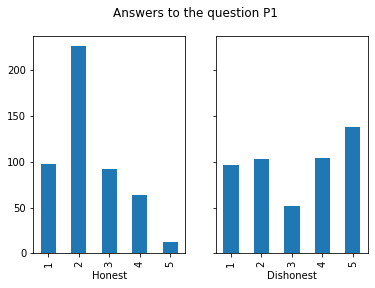

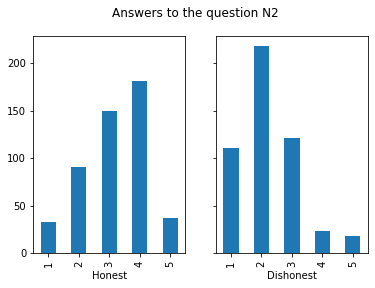

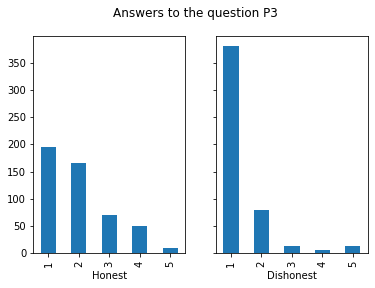

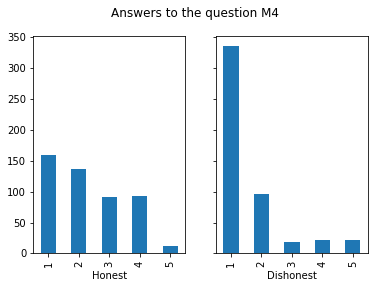

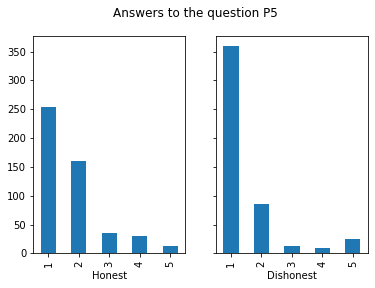

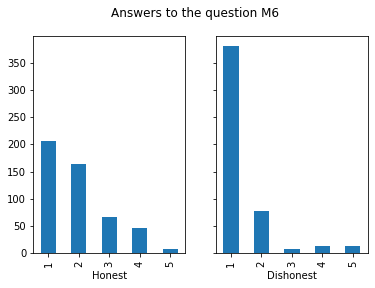

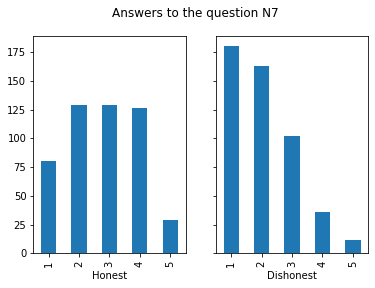

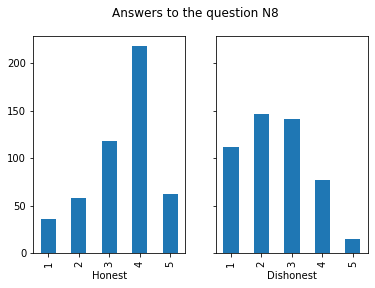

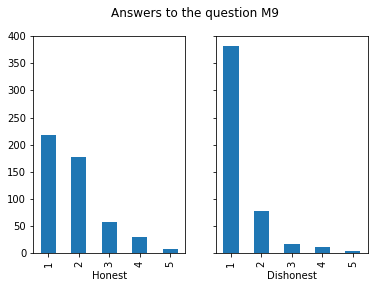

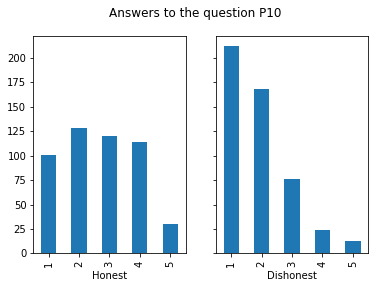

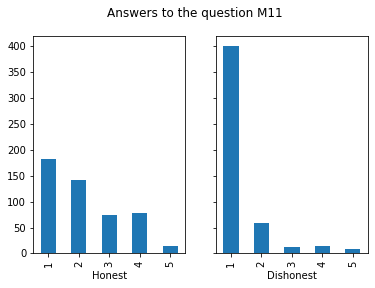

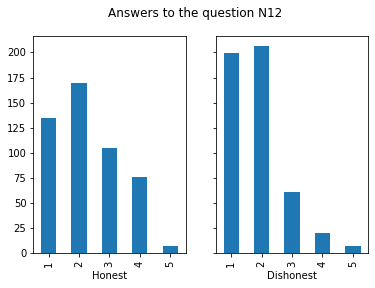

In [3]:
for elem in df:
  if elem != 'CONDITION':
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)
    fig.suptitle('Answers to the question {}'.format(elem))
    df1.groupby(elem).size().plot.bar(ax=axes[0], xlabel='Honest')
    df2.groupby(elem).size().plot.bar(ax=axes[1], xlabel='Dishonest')

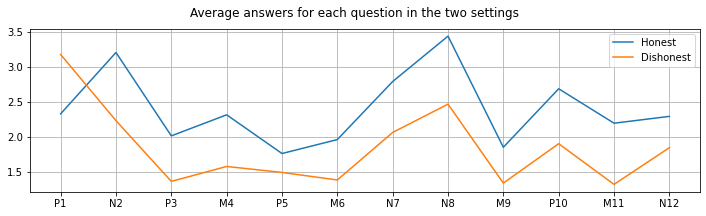

In [5]:
hon = []
dish = []
e = []
for elem in df:
  if elem != 'CONDITION':
    hon.append(df1[elem].mean())
    dish.append(df2[elem].mean())
    e.append(elem)

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(3)
f.suptitle('Average answers for each question in the two settings')
plt.plot(hon, label='Honest')
plt.plot(dish, label='Dishonest')
plt.legend()
plt.grid()
plt.xticks(range(0,12), labels=e)
plt.show()

In [6]:
cron_alpha = [0.81, 0.84, 0.74, 0.64, 0.83, 0.77, 0.87, 0.57, 0.89, 0.90, 0.83, 0.55]
X = np.zeros((986,3))
Y = np.zeros((986,))
for index, row in df.iterrows():
  if row[12] == 'H':
    Y[index] = 1
  else:
    Y[index] = -1
    
  for i in range(0, 3):
    x = []
    for n in range(4*i, 4*(i+1)):
      x.append(row[n]*cron_alpha[n])
    X[index][i] = np.sum(x)
print(X)

[[6.36 4.75 5.86]
 [6.26 5.62 4.27]
 [5.35 5.05 6.33]
 ...
 [4.68 4.48 3.72]
 [4.71 5.92 3.72]
 [6.27 5.92 3.17]]


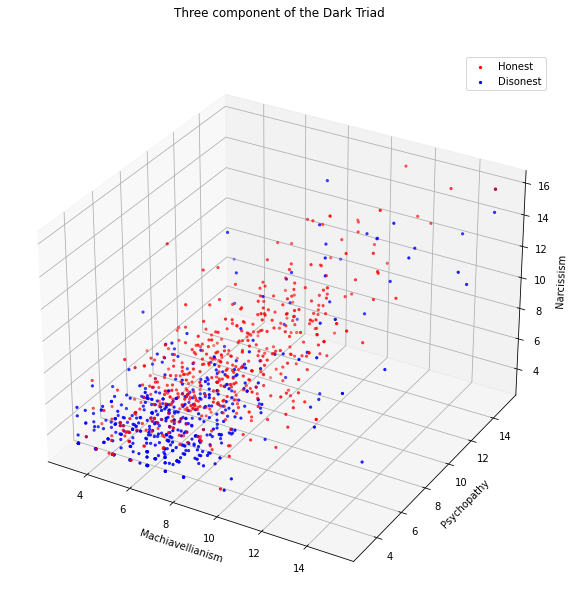

In [7]:
from mpl_toolkits import mplot3d

x = X[:,0]
y = X[:,1]
z = X[:,2]

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")

ax.scatter3D(x[Y == 1], y[Y == 1], z[Y == 1], c='r', marker='.', label='Honest')
ax.scatter3D(x[Y == -1], y[Y == -1], z[Y == -1], c='b', marker='.', label='Disonest')

ax.set_xlabel('Machiavellianism')
ax.set_ylabel('Psychopathy')
ax.set_zlabel('Narcissism')
plt.title('Three component of the Dark Triad\n\n')
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, random_state=0)

print(np.sum(y_test == 1))
print(np.sum(y_test == -1))

96
102


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_values_train = []
accuracy_values_test = []
k_values = range(1, 200)

for i in k_values:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)

  y_pred_train = knn.predict(X_train)
  y_pred_test = knn.predict(X_test)

  accuracy_values_train.append(accuracy_score(y_train, y_pred_train))
  accuracy_values_test.append(accuracy_score(y_test, y_pred_test))

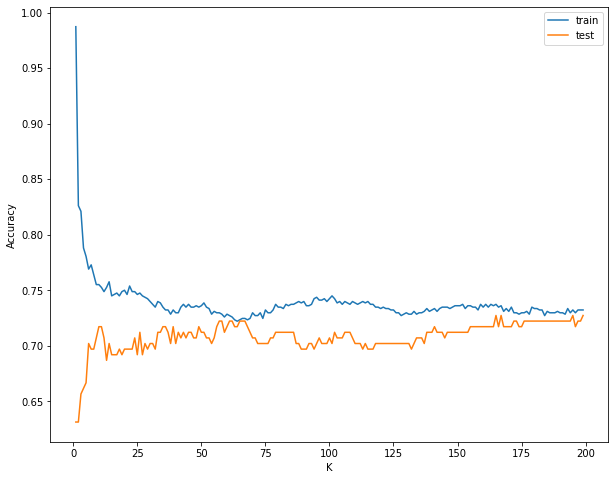

In [10]:
fig = plt.figure(figsize=(10,8))
plt.plot(k_values, accuracy_values_train, label="train")
plt.plot(k_values, accuracy_values_test, label="test")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Create train and test datasets - split response pairs

In [56]:
honest = df[df['CONDITION'] == 'H']
false = df[df['CONDITION'] == 'D']

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
        honest.drop(columns = 'CONDITION'),
        honest['CONDITION'], train_size=0.9, shuffle=False)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
        false.drop(columns = 'CONDITION'),
        false['CONDITION'], train_size=0.9, shuffle=False)

df_train = pd.DataFrame(X_train_h.append(X_train_f))
df_train['CONDITION'] = y_train_h.append(y_train_f)

df_test = pd.DataFrame(X_test_h.append(X_test_f))
df_test['CONDITION'] = y_test_h.append(y_test_f)

df_train.to_csv('train_dataset.csv', index=False)
df_test.to_csv('test_dataset.csv', index=False)

print('Percentage of honest responses in train:')
print(str(round(len(df_train[df_train['CONDITION'] == 'H']) / len(df_train), 2)))

print('Percentage of honest responses in test:')
print(str(round(len(df_test[df_test['CONDITION'] == 'H']) / len(df_test), 2)))

Percentage of honest responses in train:
0.5
Percentage of honest responses in test:
0.5


## Compute benchmark accuracy


All the proposed method should outperform the trivial strategy of subtracting to each subject faked response the average of the difference, across all subjects, among faked and honest response.

In [128]:
# Benchmark accuracy for honest response prediction

# Compute average vector of differences (honest - false ) per subject on the train data

avg_vector = X_train_h.sub(X_train_f.iloc[0, :]).mean()

print("Mean difference (honest - false) vector:")
print(list(round(avg_vector,2)))

# Compute predicted test data by subtracting mean vector from honest responces

difference = X_test_f.sub(avg_vector)
print("\nDifference matrix: ")
print(difference[0:5])

# Compute accuracy - how close are we to the true honest responces

accuracy_vector = abs(X_test_h.sub(difference.iloc[0, :])).mean()
norm_vector = np.array(accuracy_vector) / 5

print("\nAverage offset per question:")
print((np.round(norm_vector, 2)))

print("\nOverall average difference: ")
print(str(sum(norm_vector) / len(norm_vector)))
## Continue to compute accuracy by comparing the difference obtained by our models

Mean difference (honest - false) vector:
[-1.69, 0.18, 0.98, 1.3, -0.26, -0.06, -0.25, -0.56, 0.82, 0.64, 1.17, 0.26]

Difference matrix: 
           P1        N2        P3       M4        P5        M6        N7  \
936  4.693002  0.823928  0.015801 -0.30474  1.259594  1.060948  1.248307   
937  5.693002  1.823928  0.015801 -0.30474  1.259594  1.060948  2.248307   
938  5.693002  1.823928  1.015801  1.69526  3.259594  4.060948  4.248307   
939  5.693002  1.823928  2.015801  1.69526  2.259594  2.060948  2.248307   
940  2.693002  0.823928  0.015801 -0.30474  1.259594  1.060948  1.248307   

           N8       M9       P10     M11       N12  
936  1.562077  0.17833  0.358916 -0.1693  0.744921  
937  2.562077  0.17833  1.358916 -0.1693  0.744921  
938  3.562077  2.17833  2.358916  1.8307  1.744921  
939  2.562077  1.17833  1.358916  0.8307  2.744921  
940  3.562077  0.17833  2.358916 -0.1693  2.744921  

Average offset per question:
[0.44 0.52 0.45 0.54 0.17 0.23 0.38 0.39 0.38 0.54 0.51 

### Classification accuracy

In [130]:
# Benchmark accuracy for classification:

avg_vector = df_train.mean()

# Substract the average vector for each test row and calculate the sum of differences
difference_sum = df_test.sub(avg_vector).sum(axis=1)

# If the sum is positive, classify the row as honest, otherwise classify as dishonest
classification = np.sign(difference_sum)

print("Prediction vector: ")
print(list(classification))

comparison_vector = df_test['CONDITION'].replace('H', 1.0).replace('D', -1.0)

# Count the number of equal classifications
print("\nAccuracy: ")
print(sum(classification == comparison_vector) / len(classification))

Prediction vector: 
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]

Accuracy: 
0.79
